### Create augmented dataset

# Augmenting a dataset for instance segmentation

In this notebook, we illustrate how CLODSA can be employed to augment a dataset of images devoted to instance segmentation that was annotated using the [COCO format](http://cocodataset.org/#home). 

We will use a small dataset of shapes. 

In [1]:
# !wget https://www.dropbox.com/s/eus5u6ug1s7ftzc/shapes.zip?dl=0 -O shapes.zip
# !unzip shapes.zip

--2020-03-09 16:50:40--  https://www.dropbox.com/s/eus5u6ug1s7ftzc/shapes.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.70.1, 2620:100:6026:1::a27d:4601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/eus5u6ug1s7ftzc/shapes.zip [following]
--2020-03-09 16:50:41--  https://www.dropbox.com/s/raw/eus5u6ug1s7ftzc/shapes.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1eaef0a2e5cbeb16c3b9f27e4e.dl.dropboxusercontent.com/cd/0/inline/Azk9TpiTAovGrKLNJJ3K_eEknsfl_79HaRwdy0F3iY8p5J4SO5eMhqYQGCH8X58QvVIWyhBWiynasMaAcUVRyDGRDR2aoCdIKUcD7JtJLEfZGgqcjIeorUs72tyTgVkJlQ8/file# [following]
--2020-03-09 16:50:41--  https://uc1eaef0a2e5cbeb16c3b9f27e4e.dl.dropboxusercontent.com/cd/0/inline/Azk9TpiTAovGrKLNJJ3K_eEknsfl_79HaRwdy0F3iY8p5J4SO5eMhqYQGCH8X58QvVIWyhBWiynasMaAcUVRyDGRDR2aoCdIKUcD7JtJLEfZGgqc

We can check the elements of the shapes folder that are a json file with the coco annotation and two images.

In [1]:
# !ls shapes/

1000.jpeg  1001.jpeg  annotations.json


We create the output folder.

In [199]:
# !mkdir train_augmentation8

## Augmentation techniques

For this example, we consider three augmentation techniques. 

The augmentation techniques applied in this example are:
- Rotation.
- Flip.

## Installing the necessary libraries

In case that CLODSA is not installed in your system, the first task consists in installing it using ``pip``.

In [1]:
# !pip install clodsa

## Loading the necessary libraries

The first step in the pipeline consists in loading the necessary libraries to apply the data augmentation techniques in CLODSA.

In [2]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import cv2
%matplotlib inline

Using TensorFlow backend.


## Creating the augmentor object

As explained in the documentation of CLODSA, we need to specify some parameters for the augmentation process, and use them to create an augmentor object.  

_The kind of problem_. In this case, we are working in an instance segmentation problem.

In [3]:
PROBLEM = "instance_segmentation"

_The annotation mode_. The annotation is provided using the coco format in a file called annotations.json. 

In [4]:
ANNOTATION_MODE = "coco"

_The input path_. The input path containing the images. 

In [5]:
INPUT_PATH = "../data/interim/training/coco_data3_1/train"

_The generation mode_. In this case, linear, that is, all the augmentation techniques are applied to all the images of the original dataset. 

In [6]:
GENERATION_MODE = "linear"

_The output mode_. The generated images will be stored in a new folder called output.  

In [146]:
OUTPUT_MODE = "coco"
# OUTPUT_PATH= "../data/interim/training/coco_data3_1/train_augmented/"
OUTPUT_PATH = "/home/mr/Documents/train_augmented/"

Using the above information, we can create our augmentor object. 

In [147]:
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,
                            GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

## Adding the augmentation techniques

Now, we define the techniques that will be applied in our augmentation process and add them to our augmentor object. To illustrate the transformations, we will use the following image of the dataset. 



First of all, we must define a transformer generator.

In [148]:
transformer = transformerGenerator(PROBLEM)

### _Rotations:_

In [149]:
for angle in [0,180]:
    rotate = createTechnique("rotate", {"angle" : angle})
    augmentor.addTransformer(transformer(rotate))

### _Flips:_

In [150]:
flip1 = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(flip1))
flip0 = createTechnique("flip",{"flip":0})
augmentor.addTransformer(transformer(flip0))

flip_1 = createTechnique("flip",{"flip":-1})
augmentor.addTransformer(transformer(flip_1))

Invert 

In [151]:
# invert = createTechnique("invert",{})Bblurring = createTechnique("bilateral_blurring", {"diameter" : 11, "sigmaColor": 21, "sigmaSpace":7})
# augmentor.addTransformer(transformer(Bblurring))
# augmentor.addTransformer(transformer(invert))

### Bilateral blurring

In [152]:
Bblurring = createTechnique("bilateral_blurring", {"diameter" : 11, "sigmaColor": 21, "sigmaSpace":7})
augmentor.addTransformer(transformer(Bblurring))

### Gaussian blurring

In [153]:
Gaussian = createTechnique("gaussian_blur", {"kernel" : 3})
augmentor.addTransformer(transformer(Gaussian))

### Gaussian noise

In [154]:
gaussian_noise = createTechnique("gaussian_noise", {"mean" : 0,"sigma":25})
augmentor.addTransformer(transformer(gaussian_noise))

Average blurring

In [155]:
# average_blurring = createTechnique("average_blurring",{"kernel":3})
# augmentor.addTransformer(transformer(average_blurring))

### Blurring

In [156]:
blurring = createTechnique("blurring", {"ksize" : 3})
augmentor.addTransformer(transformer(blurring))

blurring = createTechnique("blurring", {"ksize" : 5})
augmentor.addTransformer(transformer(blurring))

### Dropout

In [157]:
dropout = createTechnique("dropout",{"percentage":0.02})
augmentor.addTransformer(transformer(dropout))

### Dropout2

In [158]:
dropout2 = createTechnique("dropout",{"percentage":0.04})
augmentor.addTransformer(transformer(dropout2))

Dropout3

In [159]:
# dropout2 = createTechnique("dropout",{"percentage":0.08})
# augmentor.addTransformer(transformer(dropout2))

Elastic deformation

In [160]:
# Elastic = createTechnique("elastic",{"alpha":5,"sigma":0.05})
# augmentor.addTransformer(transformer(Elastic))

### Gamma correction

In [161]:
Gamma = createTechnique("gamma",{"gamma":1.5})
augmentor.addTransformer(transformer(Gamma))

Gamma = createTechnique("gamma",{"gamma":.5})
augmentor.addTransformer(transformer(Gamma))

Salt and Pepper

In [162]:
# salt_and_pepper = createTechnique("salt_and_pepper", {"low" : 0,"up":10})
# augmentor.addTransformer(transformer(salt_and_pepper))

### Translation

In [163]:
translation = createTechnique("translation", {"x":10,"y":10})
augmentor.addTransformer(transformer(translation))

In [164]:
# translation2 = createTechnique("translation", {"x":6,"y":8})
# augmentor.addTransformer(transformer(translation2))

Crop

In [165]:
# crop = createTechnique("crop",{"percentage":0.6,"startFrom": "CENTER"})
# augmentor.addTransformer(transformer(crop))
# crop2 = createTechnique("crop",{"percentage":0.6,"startFrom": "TOPLEFT"})
# augmentor.addTransformer(transformer(crop2))
# crop3 = createTechnique("crop",{"percentage":0.6,"startFrom": "BOTTOMRIGHT"})
# augmentor.addTransformer(transformer(crop3))

Histgram

In [166]:
# t = createTechnique("equalize_histogram",{})
# augmentor.addTransformer(transformer(t))

In [167]:
# t = createTechnique("raise_blue", {"power" : 0.8})
# augmentor.addTransformer(transformer(t))

In [168]:
# t = createTechnique("raise_hue", {"power" : 0.8})
# augmentor.addTransformer(transformer(t))

### Histgram

In [169]:
t = createTechnique("raise_value", {"power" : 0.6})
augmentor.addTransformer(transformer(t))

t = createTechnique("raise_value", {"power" : 1.8})
augmentor.addTransformer(transformer(t))

## Applying the augmentation process

Finally, we apply the augmentation process (this might take some time depending on the number of images of the original dataset and the number of transformations that will be applied). 

In [170]:
len(augmentor.transformers)

17

In [175]:
137 * 17

2329

In [172]:
%%time
augmentor.applyAugmentation()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


We can now check the elements of the output folder. 

In [173]:
!ls train_augmentation8

0_1000.jpeg   14_1001.jpeg  2_1000.jpeg   26_1001.jpeg	6_1000.jpeg
0_1001.jpeg   15_1000.jpeg  2_1001.jpeg   27_1000.jpeg	6_1001.jpeg
10_1000.jpeg  15_1001.jpeg  21_1000.jpeg  27_1001.jpeg	7_1000.jpeg
10_1001.jpeg  16_1000.jpeg  21_1001.jpeg  28_1000.jpeg	7_1001.jpeg
1_1000.jpeg   16_1001.jpeg  22_1000.jpeg  28_1001.jpeg	8_1000.jpeg
1_1001.jpeg   17_1000.jpeg  22_1001.jpeg  29_1000.jpeg	8_1001.jpeg
11_1000.jpeg  17_1001.jpeg  23_1000.jpeg  29_1001.jpeg	9_1000.jpeg
11_1001.jpeg  18_1000.jpeg  23_1001.jpeg  3_1000.jpeg	9_1001.jpeg
12_1000.jpeg  18_1001.jpeg  24_1000.jpeg  3_1001.jpeg	annotation.json
12_1001.jpeg  19_1000.jpeg  24_1001.jpeg  4_1000.jpeg
13_1000.jpeg  19_1001.jpeg  25_1000.jpeg  4_1001.jpeg
13_1001.jpeg  20_1000.jpeg  25_1001.jpeg  5_1000.jpeg
14_1000.jpeg  20_1001.jpeg  26_1000.jpeg  5_1001.jpeg


## Finally, we can visualize the results using some of the tools provided by [the COCO API](https://github.com/cocodataset/cocoapi).

In [67]:
# !pip install pycocotools

In [176]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
# import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [177]:
image_directory = '/home/mr/Documents/train_augmented/'
annotation_file = '/home/mr/Documents/train_augmented/annotation.json'

In [178]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=1.41s)
creating index...
index created!


In [179]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
cell

Custom COCO supercategories: 
cell


Each execution of the following cells show a different image of the output dataset.

In [191]:
category_ids = example_coco.getCatIds(catNms=['square'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [192]:
image_data

{'id': 437,
 'file_name': '11_2019_05_20_22_16_37_57.jpg',
 'width': 1392,
 'height': 1040,
 'date_captured': '',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

In [189]:
import cv2
pylab.rcParams['figure.figsize'] = (12.0, 16.0)

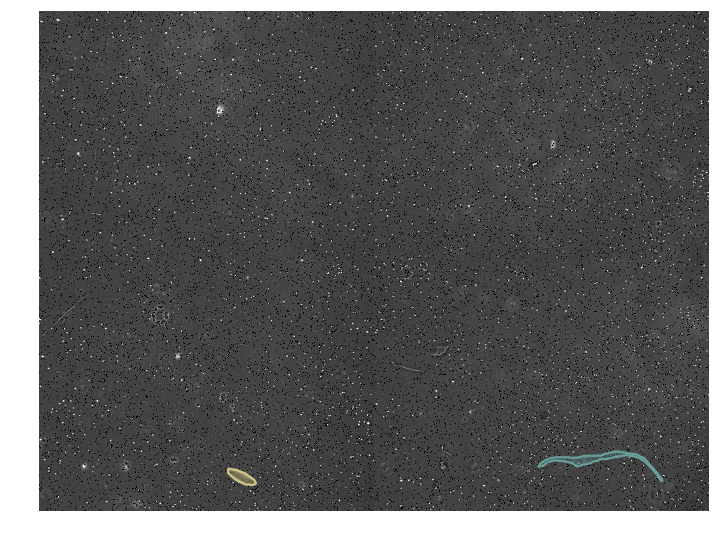

In [193]:
image = cv2.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

TypeError: Image data cannot be converted to float

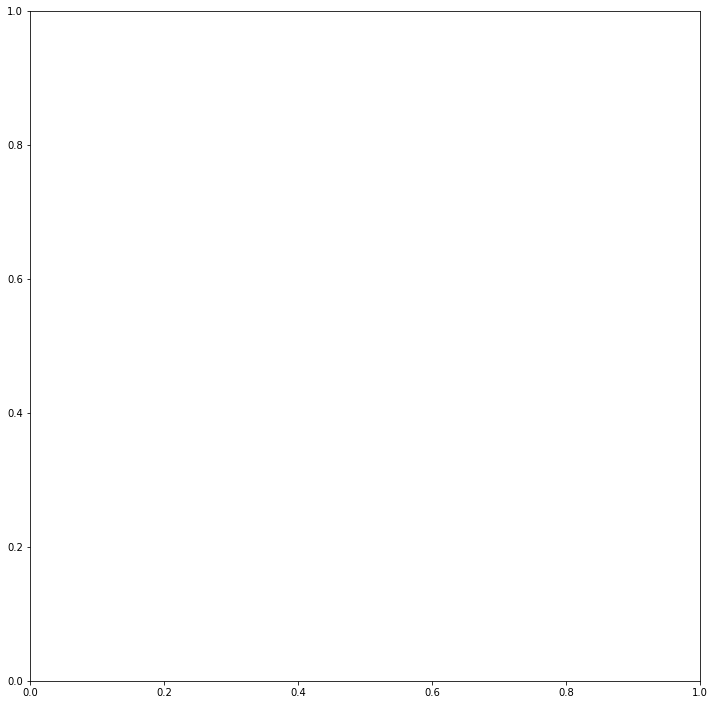

In [201]:
for _ in range(5):
    category_ids = example_coco.getCatIds(catNms=['square'])
    image_ids = example_coco.getImgIds(catIds=category_ids)
    image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]
    
    image = cv2.imread(image_directory + image_data['file_name'])
    plt.imshow(image); plt.axis('off')
    annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
    annotations = example_coco.loadAnns(annotation_ids)
    example_coco.showAnns(annotations)
    plt.show()

If you are executing this notebook in Colaboratory, you need to download the generated files. To that aim, you can create a zip folder and download it using the following commands. 

In [0]:
# !zip -r shapes.zip output
# from google.colab import files
# files.download('shapes.zip')